<center> <b> <big> Credit Scoring </big> </b> </center>

Description: 
The consumer credit department of a bank wants to automate the decisionmaking process for approval of home equity lines of credit. The model will be based on data collected from recent applicants granted credit through the current process of loan underwriting.
<br>
<br>
DataSet and content can be found: https://www.kaggle.com/ajay1735/hmeq-data
<br>
<br>
*Saakyan Artur*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("hmeq.csv")

## Analyzing the data

In [3]:
df.shape

(5960, 13)

In [4]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


count of elements in columns
"MORTDUE", "VALUE", "YOJ", "DEROG", "DELINQ", "CLAGE", "NINQ", "CLNO", "CLNO", "DEBTINC"
is less than the total number of objects (5960) &rArr; which indicates that these columns contain missing values.

In [6]:
pd.value_counts(df['BAD']) # count of two values in 'BAD' column

0    4771
1    1189
Name: BAD, dtype: int64

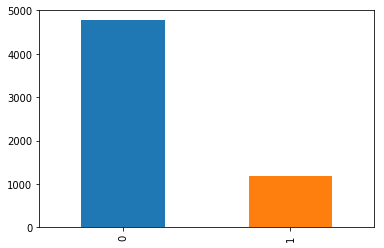

In [7]:
pd.value_counts(df['BAD']).plot(kind='bar') # visualization of "BAD" column

the dataset is not unbalanced

In [8]:
df.corr() # compute pairwise correlation of columns, excluding NA/null values

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.075099,-0.048219,-0.029954,-0.060238,0.276081,0.354107,-0.170499,0.174980,-0.004157,0.199835
LOAN,-0.075099,1.000000,0.228595,0.335393,0.105728,-0.001302,-0.035144,0.088540,0.044487,0.072631,0.084735
MORTDUE,-0.048219,0.228595,1.000000,0.875666,-0.088480,-0.049516,-0.001044,0.140047,0.031392,0.323631,0.154939
VALUE,-0.029954,0.335393,0.875666,1.000000,0.007759,-0.048689,-0.014103,0.171238,-0.004398,0.269149,0.132174
YOJ,-0.060238,0.105728,-0.088480,0.007759,1.000000,-0.065879,0.038153,0.201718,-0.071627,0.024838,-0.055891
DEROG,0.276081,-0.001302,-0.049516,-0.048689,-0.065879,1.000000,0.211832,-0.083047,0.173934,0.061884,0.017065
DELINQ,0.354107,-0.035144,-0.001044,-0.014103,0.038153,0.211832,1.000000,0.022488,0.067812,0.164639,0.052364
CLAGE,-0.170499,0.088540,0.140047,0.171238,0.201718,-0.083047,0.022488,1.000000,-0.116935,0.237987,-0.046477
NINQ,0.174980,0.044487,0.031392,-0.004398,-0.071627,0.173934,0.067812,-0.116935,1.000000,0.088389,0.141344
CLNO,-0.004157,0.072631,0.323631,0.269149,0.024838,0.061884,0.164639,0.237987,0.088389,1.000000,0.185539


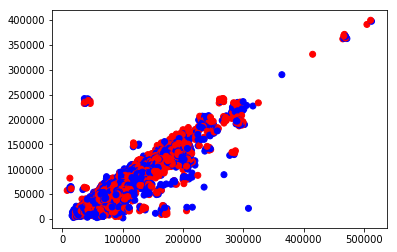

In [9]:
# there is a large value of the correlation coefficient between columns 'VALUE' and 'MORTDUE'
plt.scatter(df['VALUE'], df['MORTDUE'], c = ['b', 'r'], alpha = 1)
plt.show()

In [10]:
# delete 'MORTDUE' feature
df.drop('MORTDUE', axis = 1, inplace = True)

In [11]:
print(df.columns, len(df.columns))

Index(['BAD', 'LOAN', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ',
       'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object') 12


Let us single out numeric and categorical features:

In [12]:
numeric_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorical_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print(categorical_columns)
print(numeric_columns)

['REASON', 'JOB']
['BAD', 'LOAN', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


In [13]:
# all the different elements of categorical_columns
for i in categorical_columns:
    print(df[i].unique())

['HomeImp' nan 'DebtCon']
['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']


# Preparing the data

missing values

In [14]:
df.count(axis=0) # count of elements in each columns

BAD        5960
LOAN       5960
VALUE      5848
REASON     5708
JOB        5681
YOJ        5445
DEROG      5252
DELINQ     5380
CLAGE      5652
NINQ       5450
CLNO       5738
DEBTINC    4693
dtype: int64

In [15]:
# fill numeric columns from df (median knowledge for each columns instead of nan)
df.fillna(df.median(axis=0), axis=0, inplace=True)
df.count(axis=0) # check the results

BAD        5960
LOAN       5960
VALUE      5960
REASON     5708
JOB        5681
YOJ        5960
DEROG      5960
DELINQ     5960
CLAGE      5960
NINQ       5960
CLNO       5960
DEBTINC    5960
dtype: int64

In [16]:
# fill categorical columns from df (top element for each columns instead of nan)
df_describe = df.describe(include=[object])

for i in categorical_columns:
    df[i].fillna(df_describe[i]['top'], inplace=True)
    
df.describe(include=[object]) # check the results

,REASON,JOB
count,5960,5960
unique,2,6
top,DebtCon,Other
freq,4180,2667


In [17]:
df.count(axis=0) # check the results

BAD        5960
LOAN       5960
VALUE      5960
REASON     5960
JOB        5960
YOJ        5960
DEROG      5960
DELINQ     5960
CLAGE      5960
NINQ       5960
CLNO       5960
DEBTINC    5960
dtype: int64

# Vectorization and Standardization

Before submitting data to the input of algorithms of machine learning, we transform categorical columns into numeric columns.

In [18]:
# they is only one binary column
print(df['REASON'].unique())

# they is only one nonbinary column
print(df['JOB'].unique())

['HomeImp' 'DebtCon']
['Other' 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']


In [19]:
# the values of the binary features ('REASON') are replaced by 0 and 1
df.at[df['REASON'] == 'HomeImp', 'REASON'] = 1
df.at[df['REASON'] == 'DebtCon', 'REASON'] = 0
df['REASON'].unique()

array([1, 0])

In [20]:
# Vectorization
# The attribute 'j', taking 's' values, is replaced by 's' signs taking values 0 or 1, 
# depending on what the value of the original characteristic 'j' is equal.
df_nonbinary = pd.get_dummies(df['JOB']) # convert categorical variable into dummy/indicator variables
df_nonbinary.head()

,Mgr,Office,Other,ProfExe,Sales,Self
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0


<b> Standardization </b> transforms data to have a mean of 0 and a standard deviation of 1 (this standardization is called a z-score). Many machine learning algorithms are sensitive to data scaling (for example, KNeighborsClassifier, SVM and others).

In [21]:
# process of standardization
df_numeric = df[numeric_columns].drop('BAD', axis=1)
df_numeric = (df_numeric - df_numeric.mean()) / df_numeric.std()
df_numeric.describe() # check the results

,LOAN,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5.960000e+03,5.960000e+03,5.960000e+03,5.960000e+03,5.960000e+03,5.960000e+03,5.960000e+03,5.960000e+03,5.960000e+03
mean,-1.525998e-16,-1.907497e-17,-8.536050e-16,6.288780e-17,2.145934e-17,-1.143545e-14,3.576557e-17,5.722492e-17,4.018620e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.562168e+00,-1.644827e+00,-1.206179e+00,-2.809526e-01,-3.759114e-01,-2.147070e+00,-7.075147e-01,-2.135179e+00,-4.379100e+00
25%,-6.699070e-01,-6.163396e-01,-7.929233e-01,-2.809526e-01,-3.759114e-01,-7.426805e-01,-7.075147e-01,-6.278390e-01,-4.235044e-01
50%,-2.059312e-01,-2.163708e-01,-2.419154e-01,-2.809526e-01,-3.759114e-01,-7.148166e-02,-1.028706e-01,-1.253924e-01,1.069537e-01
75%,4.186517e-01,3.070958e-01,4.468445e-01,-2.809526e-01,-3.759114e-01,5.707748e-01,5.017734e-01,4.775434e-01,5.166101e-01
max,6.361111e+00,1.326492e+01,4.441652e+00,1.224319e+01,1.352255e+01,1.183125e+01,9.571434e+00,4.999562e+00,2.214806e+01


Create new DataFrame (join the data processed by us)

In [22]:
data = pd.concat((df_numeric, df['BAD'], df['REASON'], df_nonbinary), axis=1) # concatenate pandas objects
data = pd.DataFrame(data, dtype=float) # create new DataFrame
print(data.shape[0] == df.shape[0]) # check the results of the count of the objects
print(len(data.columns)) # check count of the columns
print(data.columns)

True
17
Index(['LOAN', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO',
       'DEBTINC', 'BAD', 'REASON', 'Mgr', 'Office', 'Other', 'ProfExe',
       'Sales', 'Self'],
      dtype='object')


# Machine Learning Models

splitting data into training and test samples (cross validation)

In [23]:
y = data['BAD']
X = data.drop('BAD', axis=1)  # delete column 'BAD'

# train = 70%, test = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)
print(y_train.shape[0], y_test.shape[0]) # count of objects for training and test

4172 1788


In [24]:
# list of algorithms we compare
classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    KNeighborsClassifier(),
    KNeighborsClassifier(n_neighbors=7),
    KNeighborsClassifier(n_neighbors=9),
    SVC(),
    DecisionTreeClassifier(),
    LogisticRegression(),
    ensemble.RandomForestClassifier(n_estimators=100),
    ensemble.GradientBoostingClassifier(n_estimators=100)
]

for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train, y_train)
    
    y_predict = clf.predict(X_test)
    a1 = accuracy_score(y_test, y_predict)
    p1 = precision_score(y_test, y_predict, average="macro")
    r1 = recall_score(y_test, y_predict, average="macro")
    f1 = f1_score(y_test, y_predict, average="macro")
    
    
    print("_ _ _")
    print("accuracy = " + str(a1))
    print("_ _ _")
    print("precision = " + str(p1))
    print("_ _ _")
    print("recall = " + str(r1))
    print("_ _ _")
    print("f1 = " + str(f1))
    print("\n")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
_ _ _
accuracy = 0.9093959731543624
_ _ _
precision = 0.9290852210449397
_ _ _
recall = 0.788833552373706
_ _ _
f1 = 0.8355852736499143


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
_ _ _
accuracy = 0.8887024608501118
_ _ _
precision = 0.9060360229851756
_ _ _
recall = 0.7423451153996911
_ _ _
f1 = 0.7896364877927653


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
_ _ _
accuracy = 0.8763982102908278
_ _ _
precision = 0.9046938889822439
_ _ _
recall = 0.7082324594775311
_ _ _
f1 = 0.7556130732051247


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_p

# Conclusion: 
&#10102; The best result of accuracy = 0.9177852348993288 (RandomForestClassifier)
<br>
<br>
&#10103; The best result of recall = 0.8367169306679578 (RandomForestClassifier)
<br>
<br>
&#10104; The best result of precision = 0.9290852210449397 (KNeighborsClassifier(n_neighbors=3))
<br>
<br>
&#10105; The best result of f1 = 0.8632702544812133 (RandomForestClassifier)
<br>
<br>
&#10004; Random Forest gives the good results.